In [13]:
print("Hello World")

Hello World


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt

In [6]:
cd "/content/drive/MyDrive/Final year Project/dat_file/others/"

/content/drive/MyDrive/Final year Project/dat_file/others


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pwd

'/content/drive/MyDrive/Final year Project/dat_file/others'

In [8]:
datagen = preprocessing.image.ImageDataGenerator(rescale=1/255)# normalisation
train_generator = datagen.flow_from_directory(
        'final_image_data/train',
        batch_size=10,
        target_size=(512,512),
        class_mode='binary')
val_generator = datagen.flow_from_directory(
        'final_image_data/val',
        color_mode='rgb',
        target_size=(512,512),
        class_mode='binary')

Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


In [9]:
# model
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4), strides=4))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((1, 3), strides=(1,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
3/3 [==============================] - 6s 2s/step - loss: 2.8876 - accuracy: 1.0000 - true_negatives: 24.0000 - true_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - val_loss: 2.8840 - val_accuracy: 1.0000 - val_true_negatives: 6.0000 - val_true_positives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.8977 - accuracy: 1.0000 - true_negatives: 24.0000 - true_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - val_loss: 2.8804 - val_accuracy: 1.0000 - val_true_negatives: 6.0000 - val_true_positives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 2.9250 - accuracy: 1.0000 - true_negatives: 24.0000 - true_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - val_loss: 2.8770 - val_accu

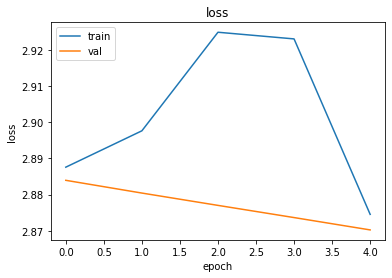

KeyError: ignored

In [11]:
# fitiing
history=model.fit_generator(train_generator,epochs=5,validation_data=val_generator,shuffle=True,
                            callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
#testing 
loss,accuracy,tn,tp,fn,fp=model.evaluate_generator(val_generator)
print(accuracy,tn,tp,fn,fp)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


1.0 6.0 0.0 0.0 0.0
